# Wine quality prediction
## Linear regression

The project aims at creating a regression model to predict the quality of wine.

The project will hghlight how choosing the number of model variables impacts the model evaluation.

**`Recalling from Coursera - IBM Data Sceince Professional Certificate,`** 

The data science process involves:
1) Business understanding.

2) Analytical Approach. 

3) Data requirement. 
* What are the required data and in what formate?

4) Data collection. 
* Know the sources of your data and eleminate useless data.

5) Data understanding.
* Descriptive statistics:
perform discriptive statistics, correlations, histograms
* Data quality:
Investigate missing values and missleading values.

6) Data preparation.
* Treat missing values 
* Treat categorical data
* Remove dublicated data

7) Modelling.

What is the purpose of data modelling (build discriptive or predictive models)
* Descriptive modells show how something works.
* Predictive models answer what can happen in  the future by using the past.

8) Evaluation. 
* Aims at assesing wether the model answer the question and if it needs to be adjusted.

9) Deployment.

10) Feedback.

<img src="IBM data science process.PNG">

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## `1.` Read the dataset 

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
wine = pd.read_csv('wine.csv')
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# get the total number of rows in the dataframe
n_rows = wine.shape[0]
print('number of rows is :', n_rows)

number of rows is : 25


c. The number of unique entries in the year column in the dataset.

In [4]:
# get the number of unique values in the year column
wine.Year.nunique()

25

d. Describe the dataset

In [5]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


e. get information on the dataset and dtypes

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


In [7]:
wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

no missing values in the dataset

## `2.`EDA

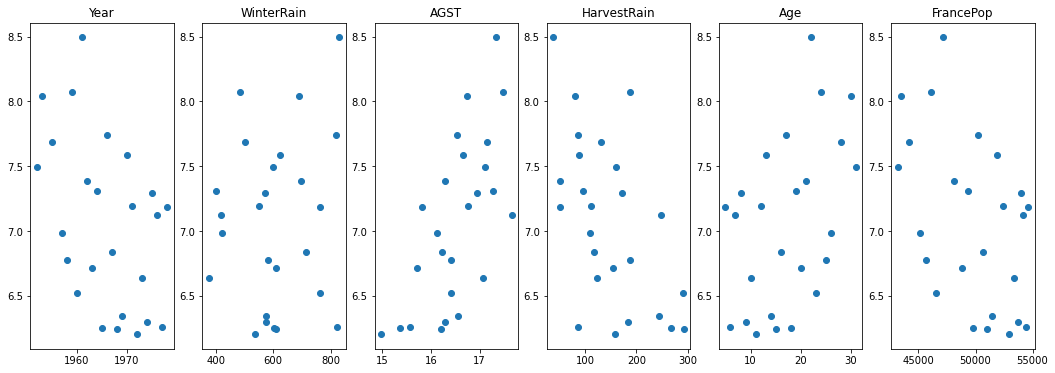

In [8]:
# plot scatter plots with log scale


cols = ['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age','FrancePop']
plt.figure(figsize = (18,6))
for i in range(len(cols)):
    plt.subplot(1,6,i+1)
    plt.scatter(wine[cols[i]], wine['Price'])
    plt.title(cols[i])

plt.show()


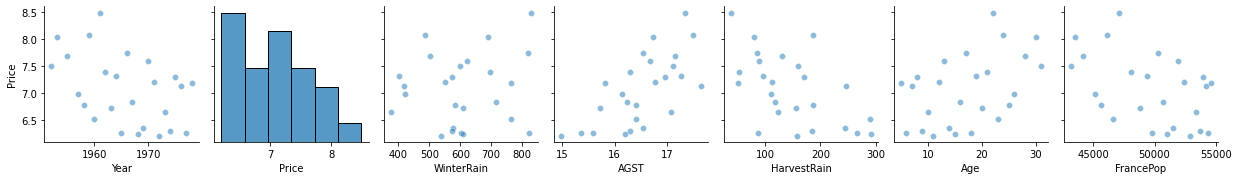

In [9]:
# pairplot for the price
sns.pairplot(wine, plot_kws={'alpha': 0.5, 'edgecolor': 'white'},  y_vars=['Price']);

Note that the **subplot** figure is similar to the **pairplot** figure outcome. However, the subplot allows for control of the figure size and the scale of x and y.

It looks like there is some sort of relation between wine price and age, AGST, year.

Lets investigae the correlation between these parameters and wine price (our target variable)

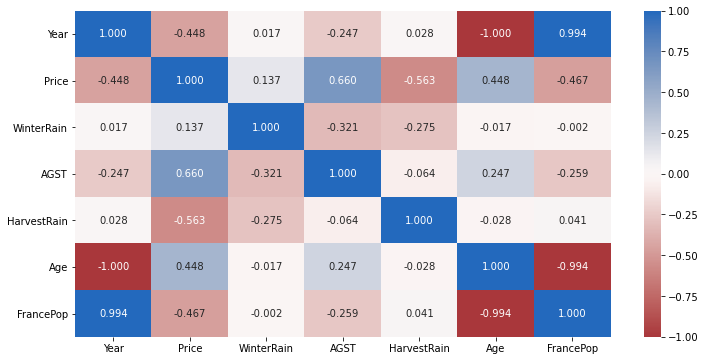

In [10]:
plt.figure(figsize = [12, 6])
col = ['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age','FrancePop']
sns.heatmap(wine.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()


In [11]:
# create correlation plot

col_names = ('parameter', 'corr')
corr_df = pd.DataFrame(columns = col_names)

for i in ['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age','FrancePop']:

    correlation = wine[['Price', i]].corr()[i][0]
    corr_df = corr_df.append({'parameter': i ,'corr': correlation}, ignore_index = True)
corr_df


,parameter,corr
0,Year,-0.447768
1,WinterRain,0.136651
2,AGST,0.659563
3,HarvestRain,-0.563322
4,Age,0.447768
5,FrancePop,-0.466862


## `3.` Apply linear regression model 

2.a Linear regression model with one parameter

In [28]:
# import the statsmodels
import statsmodels.api as sm

# Define the intercept
wine['intercept'] = 1
# apply linear regression model 
lm = sm.OLS(wine['Price'],wine[['AGST', 'intercept']])
result1 = lm.fit()

In [29]:
# read the results summary 
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           0.000335
Time:                        16:33:02   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
intercept     -3.4178      2.494     -1.371      0.184      -8.576       1.740
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared** will always increase if you increase the number of independednt variables in the model.
**Adjusted R-squared** will decrease if you add an independant variable that does not help the model 

2.b linear regression model with two parameters

In [14]:
lm2 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain', 'intercept']])
result2 = lm2.fit()

In [15]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.35e-06
Time:                        16:21:48   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6026      0.111      5.415      0.000       0.372       0.833
HarvestRain    -0.0046      0.001     -4.525      0.000      -0.007      -0.002
intercept      -2.2027      1.854     -1.188      0.248      -6.048       1.643
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.096
Skew:                          -0.511   Prob(JB):                        0.578
Kurtosis:                       3.080   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The addition of another variable to the regression model helped the R-squared to increase indicating the model performance is imporved**

2.c using all the available independant variables in the regression model

In [16]:
lm3 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']])
result3 = lm3.fit()

In [17]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.04e-06
Time:                        16:21:48   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6012      0.103      5.836      0.000       0.386       0.817
HarvestRain    -0.0040      0.001     -4.523      0.000      -0.006      -0.002
WinterRain      0.0010      0.001      1.963      0.064   -6.89e-05       0.002
Age             0.0006      0.079      0.007      0.994      -0.165       0.166
FrancePop   -4.953e-05      0.000     -0.297      0.770      -0.000       0.000
intercept      -0.4504     10.189     -0.044      0.965     -21.776      20.875
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2.d using harvest rain and winterrain

In [18]:
lm4 = sm.OLS(wine['Price'],wine[['HarvestRain','WinterRain','intercept']])
result4 = lm4.fit()

In [19]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     5.122
Date:                Thu, 09 Sep 2021   Prob (F-statistic):             0.0149
Time:                        16:21:48   Log-Likelihood:                -19.428
No. Observations:                  25   AIC:                             44.86
Df Residuals:                      22   BIC:                             48.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
HarvestRain    -0.0050      0.002     -3.105      0.005      -0.008      -0.002
WinterRain  -9.848e-05      0.001     -0.109      0.914      -0.002       0.002
intercept       7.8653      0.662     11.888      0.000       6.493       9.237
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.235
Skew:                           0.195   Prob(JB):                        0.889
Kurtosis:                       2.730   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **F-statistic** in linear regression is comparing your produced linear model against a model that replaces your variables’ effect to 0,
* The **standard error** measure the variation of the coeffiecent.
* The **t value** is the coefficent divided by the standard error.
It will be negative if the estimate is negative and positive if the estimate is positive.
The larger the absolute value of the t value, the more likely the coefficient is to be significant.

* **P**: a measurement of significance of the selected coefficent to the model through highlighting how likely the result produced by chance. P value of 0.1, means there is 10% chance the results are produced by chance. We look for independent variables with small p-value (high siginificance) less than 0.05.
* **Skew** is a measurement of symmetry in our data, with 0 being perfect symmetry.
* **[0.025 - 0.975]** measurements of values in the coefficent within 95% of the data, or within two standard deviations. Outside of these values the data points are outliers. Note that these values are the same even if we cahnge the model because they depend on the distribution of the parameter (coefficent).

## `3".` Recalculate the regression model based on the correlation data

In [20]:
## construct the model without Age and FrancePop as they have low correlation 
lm5 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','WinterRain','intercept']])
result5 = lm5.fit()

In [21]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.42
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.36e-06
Time:                        16:21:48   Log-Likelihood:                -6.6922
No. Observations:                  25   AIC:                             21.38
Df Residuals:                      21   BIC:                             26.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6810      0.112      6.097      0.000       0.449       0.913
HarvestRain    -0.0039      0.001     -3.953      0.001      -0.006      -0.002
WinterRain      0.0012      0.001      1.987      0.060   -5.47e-05       0.002
intercept      -4.3016      2.037     -2.112      0.047      -8.537      -0.066
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.419
Skew:                          -0.303   Prob(JB):                        0.811
Kurtosis:                       2.810   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#get information on the methodsw that can be implemented on the results
help(result5)

Help on RegressionResultsWrapper in module statsmodels.regression.linear_model object:

class RegressionResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
 |  RegressionResultsWrapper(results)
 |  
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Compute the confidence interval of the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The `alpha` level for the confidence interval. The default
 |          `alpha` = .05 returns a 95% confidence interval.
 |      cols : array_like, optional
 |          Columns to included in returned confidence intervals.
 |      
 |      Retu

In [23]:
result5.conf_int()

,0,1
AGST,0.448729,0.913319
HarvestRain,-0.006025,-0.001871
WinterRain,-0.000055,0.002408
intercept,-8.537122,-0.066130


So this model looks pretty good,
but if we look at our R-squared, we
can see that it dropped to 0.75.
The model that includes Age has an R-squared of 0.83.
So if we had removed Age and FrancePopulation
at the same time, we would have missed a significant variable,
and the R-squared of our final model would have been lower.
So why didn't we keep FrancePopulation
instead of Age?
Well, we expect Age to be significant.
Older wines are typically more expensive,
so Age makes more intuitive sense in our model.

**ml3 is the best model we have as its R-squared is 0.83**

## `4.` compare each model to the original price data

The target is to highlight how the models compare to the orginal data and justify the selection of the model with the lowest R-squared

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa 

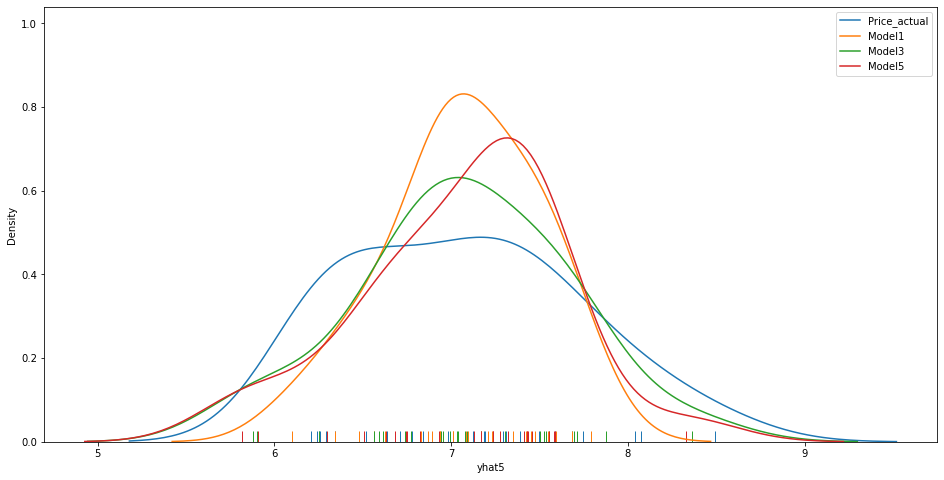

In [61]:
# plot distribution plot


wine['yhat1'] = result1.predict(wine[['AGST', 'intercept']]).tolist()
wine['yhat3'] = result3.predict(wine[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']]).tolist()
wine['yhat5'] = result5.predict(wine[['AGST','HarvestRain','WinterRain','intercept']]).tolist()

plt.figure(figsize=(16,8))
sns.distplot(wine['Price'], hist=False, rug=True)
sns.distplot(wine['yhat1'], hist=False, rug=True)
sns.distplot(wine['yhat3'], hist=False, rug=True)
sns.distplot(wine['yhat5'], hist=False, rug=True)


plt.legend(['Price_actual', 'Model1', 'Model3', 'Model5'])
plt.show()

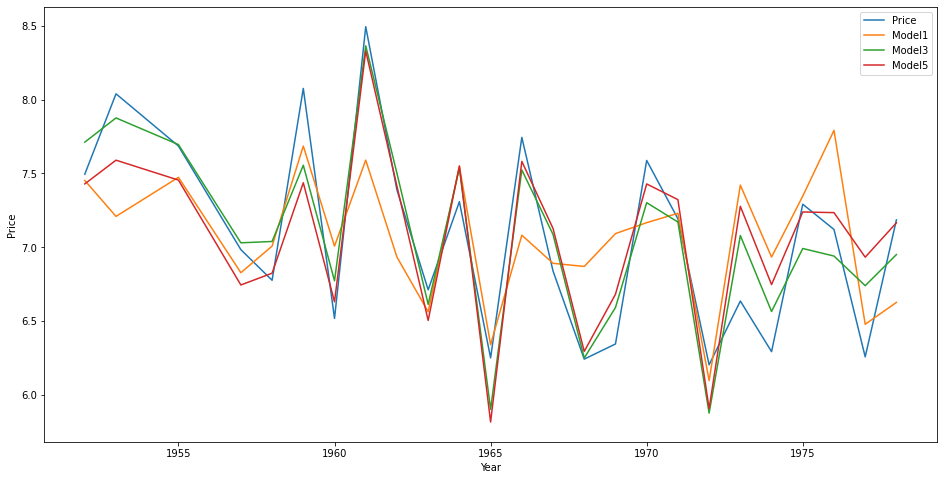

In [62]:
# show the linear trend of actual price data and different models
plt.figure(figsize=(16,8))
sns.lineplot(data = wine, x='Year', y='Price') 
sns.lineplot(data = wine, x='Year', y='yhat1') 
sns.lineplot(data = wine, x='Year', y='yhat3') 
sns.lineplot(data = wine, x='Year', y='yhat5') 
plt.legend(['Price', 'Model1', 'Model3', 'Model5'])
plt.show()

## `4.` Making predictions

In [24]:
## Load the testing data 
wine_test = pd.read_csv('wine_test.csv')
wine_test['intercept'] = 1
wine_test = wine_test[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']]

In [25]:
wine_test.head()

,AGST,HarvestRain,WinterRain,Age,FrancePop,intercept
0,16.1667,122,717,4,54835.832,1
1,16.0000,74,578,3,55110.236,1


In [35]:
wine_test['price_predicted_1'] = result1.predict(wine_test[['AGST', 'intercept']]).tolist()
wine_test['price_predicted_2'] = result2.predict(wine_test[['AGST','HarvestRain', 'intercept']]).tolist()
wine_test['price_predicted_3'] = result3.predict(wine_test[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']]).tolist()
wine_test['price_predicted_4'] = result4.predict(wine_test[['HarvestRain','WinterRain','intercept']]).tolist()
wine_test['price_predicted_5'] = result5.predict(wine_test[['AGST','HarvestRain','WinterRain','intercept']]).tolist()

In [43]:
wine_test.head()

,AGST,HarvestRain,WinterRain,Age,FrancePop,intercept,price_predicted_1,price_predicted_2,price_predicted_3,price_predicted_4,price_predicted_5
0,16.1667,122,717,4,54835.832,1,6.849618,6.982126,6.820462,7.188251,7.070185
1,16.0000,74,578,3,55110.236,1,6.743748,7.101033,6.751144,7.440549,6.982632


In [44]:
prediction_columns =wine_test.columns.tolist()[6:]

<AxesSubplot:>

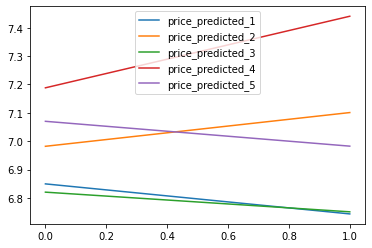

In [46]:
wine_test[prediction_columns].plot()